# Clase 4 - Segmentación vs tiramisu vs 16 bits
![picture](https://drive.google.com/uc?id=1Ar6KpqlsLxcLlnOrXPx6QZejStP6bV9P)

## Pre requisitos

Se actualiza fastai descargando y ejecutando el script *colab*

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Dar permiso para acceder a mi Drive

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Nos aseguramos que cualquier cambio en una librería es recargado automáticamente y que que cualquier gráfica o imagen se muestre aquí

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importamos las librerías necesarias

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

## Clase 4 - Segmentación vs tiramisu vs 16 bits

### Carga de los modelos

Copiamos los modelos de Drive

In [0]:
drive_folder = '/content/drive/My\ Drive/Colab\ Notebooks/Curso\ fastai/04\ Segmentacion'
model_name = 'segmentacion.pkl'
model_tiramisu_name = 'segmentacion_tiramisu.pkl'
model_16b_name = 'segmentacion_16b.pkl'
model_tiramisu_16b_name = 'segmentacion_tiramisu_16b.pkl'

In [0]:
model_link = drive_folder + '/' + model_name
model_tiramisu_link = drive_folder + '/' + model_tiramisu_name
model_16b_link = drive_folder + '/' + model_16b_name
model_tiramisu_16b_link = drive_folder + '/' + model_tiramisu_16b_name

In [0]:
!cp {model_link} /content/data
!cp {model_tiramisu_link} /content/data
!cp {model_16b_link} /content/data
!cp {model_tiramisu_16b_link} /content/data

Definimos la función de métrica

In [0]:
def acc_camvid(input, target):
    target = target.squeeze(1)  # The output array is input array, but with all or a subset of the dimensions of length 1 removed
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

Lo cargamos

In [0]:
path_model = Path("/content/data/")
learn34 = load_learner(path_model, model_name)
learn34_tiramisu = load_learner(path_model, model_tiramisu_name)
learn34_16b = load_learner(path_model, model_16b_name).to_fp16()
learn34_tiramisu_16b = load_learner(path_model, model_tiramisu_16b_name).to_fp16()

In [0]:
path = untar_data(URLs.CAMVID)
path_img = path/'images'
path_img_ex = path_img/'0016E5_08049.png'

Lo probamos

In [0]:
import time

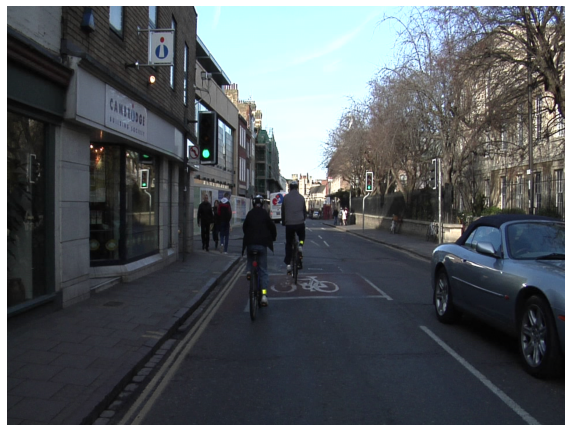

In [21]:
img = open_image(path_img_ex)
img.show(figsize=(10,10))

In [22]:
start_time = time.time()

predict_class, predict_idx, outputs = learn34.predict(img)

end_time = time.time()
print("--- %s segundos ---" % (end_time - start_time))

--- 0.719484806060791 segundos ---


In [23]:
start_time = time.time()

predict_tiramisu_class, predict_tiramisu_idx, outputs_tiramisu = learn34_tiramisu.predict(img)

end_time = time.time()
print("--- %s segundos ---" % (end_time - start_time))

--- 0.10379648208618164 segundos ---


In [24]:
start_time = time.time()

predict_16b_class, predict_16b_idx, outputs_16b = learn34_16b.predict(img)

end_time = time.time()
print("--- %s segundos ---" % (end_time - start_time))

--- 0.686882495880127 segundos ---


In [25]:
start_time = time.time()

predict_tiramisu_16b_class, predict_tiramisu_16b_idx, outputs_tiramisu_16b = learn34_tiramisu_16b.predict(img)

end_time = time.time()
print("--- %s segundos ---" % (end_time - start_time))

--- 0.10662031173706055 segundos ---


torch.Size([1, 720, 960])
torch.Size([1, 360, 480])
torch.Size([1, 720, 960])
torch.Size([1, 360, 480])


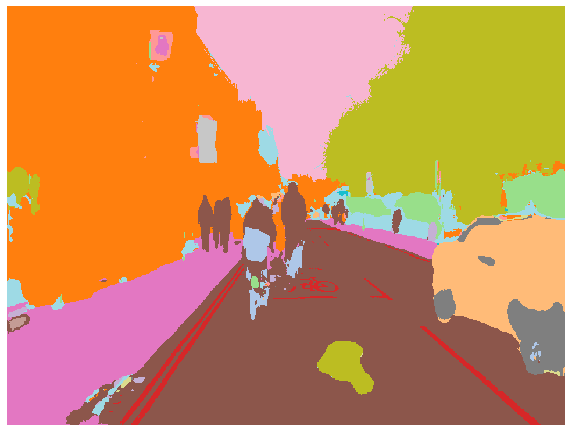

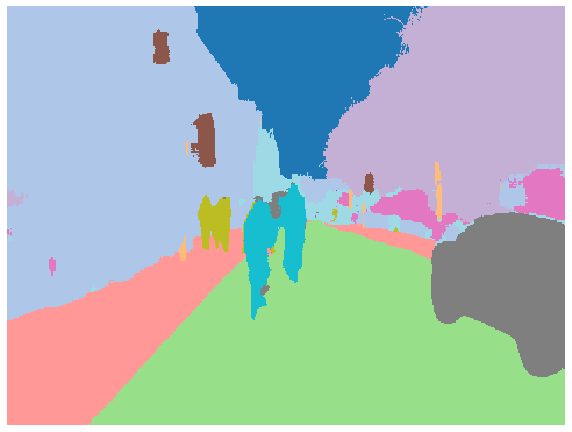

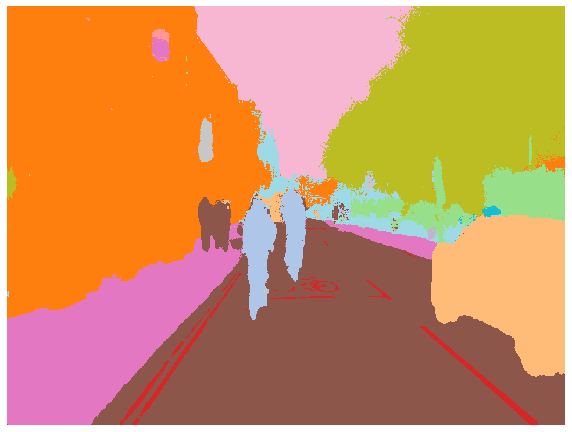

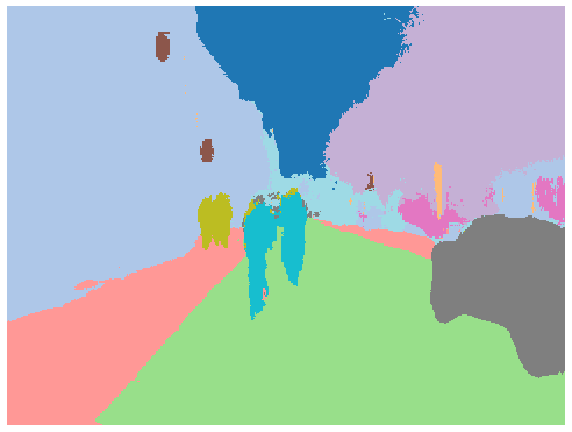

In [26]:
predict_seg = ImageSegment(predict_idx)
print(predict_seg.shape)
predict_seg.show(figsize=(10,10), alpha=1)

predict_tiramisu_seg = ImageSegment(predict_tiramisu_idx)
print(predict_tiramisu_seg.shape)
predict_tiramisu_seg.show(figsize=(10,10), alpha=1)

predict_16b_seg = ImageSegment(predict_16b_idx)
print(predict_16b_seg.shape)
predict_16b_seg.show(figsize=(10,10), alpha=1)

predict_tiramisu_16b_seg = ImageSegment(predict_tiramisu_16b_idx)
print(predict_tiramisu_16b_seg.shape)
predict_tiramisu_16b_seg.show(figsize=(10,10), alpha=1)

In [18]:
print('fin')

fin
